In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle
import pandas as pd

In [ ]:
# We'll start by reading in the corpus, which preserves word order

data = pd.read_pickle("/content/drive/MyDrive/project_pop/data_clean_df.pkl")
data['name'] = ['Madonna', 'Michael Jackson', 'Rihanna', 'The Beatles', 'Taylor Swift']


In [ ]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['lyrics'].apply(pol)
data['subjectivity'] = data['lyrics'].apply(sub)
data

,lyrics,name,polarity,subjectivity
Madonna,life is a mystery everyone must stand alone i...,Madonna,0.017469,0.574805
Michael Jackson,she was more like a beauty queen from a movie...,Michael Jackson,-0.081073,0.545307
Rihanna,work work work work work work he said me haff...,Rihanna,0.137666,0.560673
Taylor Swift,vintage tee brand new phone high heels on cob...,The Beatles,-0.004900,0.533941
The Beatles,when i find myself in times of trouble mother...,Taylor Swift,0.031794,0.560245


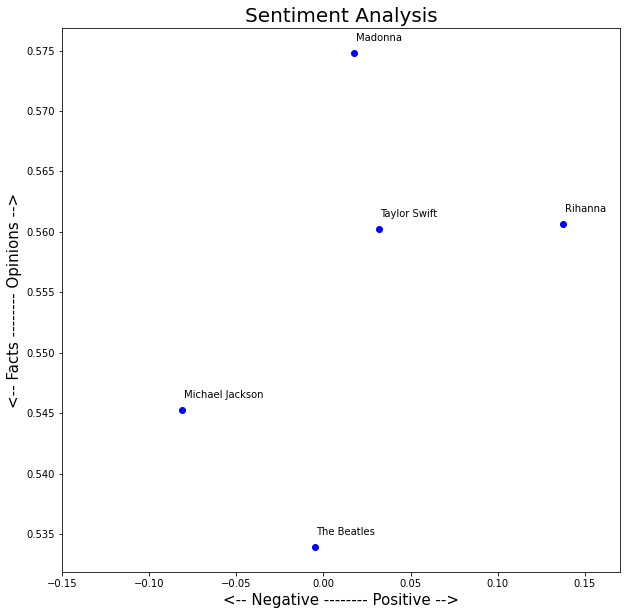

In [ ]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 10]

for index, rapper in enumerate(data.index):
    x = data.polarity.loc[rapper]
    y = data.subjectivity.loc[rapper]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['name'][index], fontsize=10)
    plt.xlim(-.15, .17) 
     
#plt.vlines(0, ymin=0, ymax=1)
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [ ]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [ ]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.lyrics:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[[' life is a mystery everyone must stand alone i hear you call my name and it feels like home   when you call my name its like a little prayer im down on my knees i want to take you there in the midnight hour i can feel your power just like a prayer you know ill take you there   i hear your voice its like an angel sighing i have no choice i hear your voice feels like flying i close my eyes oh god i think im falling out of the sky i close my eyes heaven help me  when you call my name its like a little prayer im down on my knees i want to take you there in the midnight hour i can feel your power just like a prayer you know ill take you there   like a child you whisper softly to me youre in control just like a child now im dancing its like a dream no end and no beginning youre here with me its like a dream let the choir sing   when you call my name its like a little prayer im down on my knees i wanna take you there in the midnight hour i can feel your power just like a prayer you know il

In [ ]:
# The list has 10 elements, one for each transcript
len(list_pieces)

5

In [ ]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [ ]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[-0.3301169590643275,
  0.1558080808080808,
  0.19923076923076927,
  0.02574929971988795,
  0.29281204906204905,
  -0.02558275058275059,
  -0.27773437500000003,
  0.02500154607297463,
  0.14056437389770723,
  0.1697004608294931],
 [0.042030423280423265,
  0.37019969278033793,
  -0.014861111111111103,
  -0.09550264550264548,
  -0.011453823953823964,
  0.237406015037594,
  0.195,
  0.11638981173864893,
  -0.26428902116402103,
  -0.4663461538461544],
 [0.05260416666666667,
  0.21255952380952384,
  0.10691721132897603,
  -0.12039141414141413,
  0.09440993788819876,
  0.570265780730897,
  0.34144781144781144,
  -0.01832010582010582,
  0.02935924369747899,
  -0.1225606909430439],
 [0.12195346320346323,
  0.16218045112781954,
  0.2859090909090909,
  0.12102272727272724,
  -0.24844720496894415,
  -0.03436748436748435,
  -0.09751984126984124,
  -0.09969512195121952,
  0.07098617756512493,
  -0.08256830601092896],
 [0.22142857142857142,
  0.020483749055177622,
  0.014457671957671964,
  0.106250

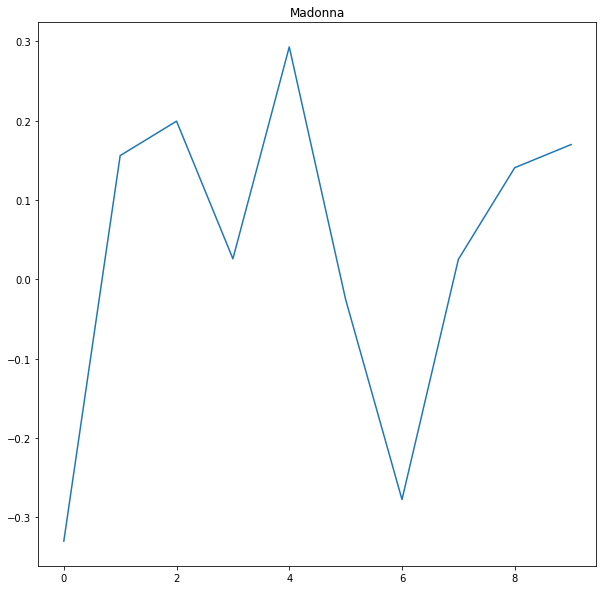

In [ ]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['name'].index[0])
plt.show()

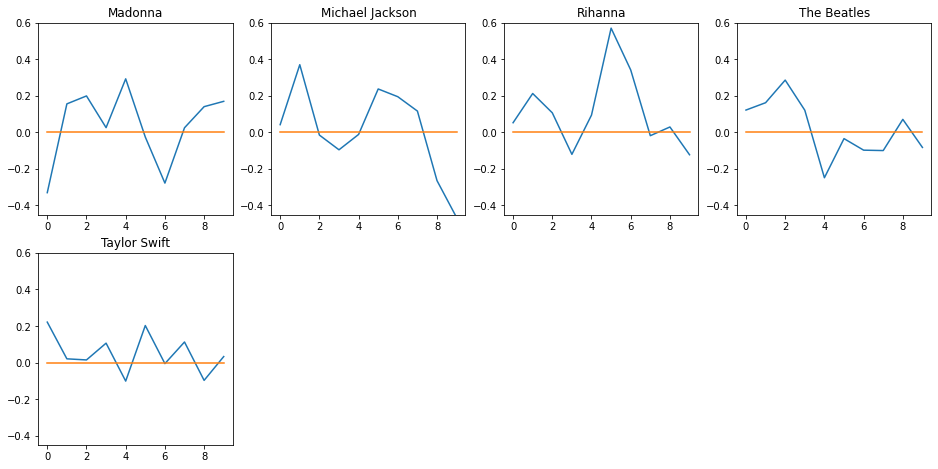

In [ ]:
# Show the plot for all rapper
plt.rcParams['figure.figsize'] = [16, 12]

for index, rapper in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['name'][index])
    plt.ylim(ymin=-.45, ymax=.6)
    
plt.show()